### REGRESSION METRICS : MEAN SQUARE ERROR, ROOT MEAN SQUARE ERROR AND MEAN ABSOLUTE ERROR
#### MANUAL CODING, SCIKIT-LEARN (ML), & NEURAL NETWORKS (DL)

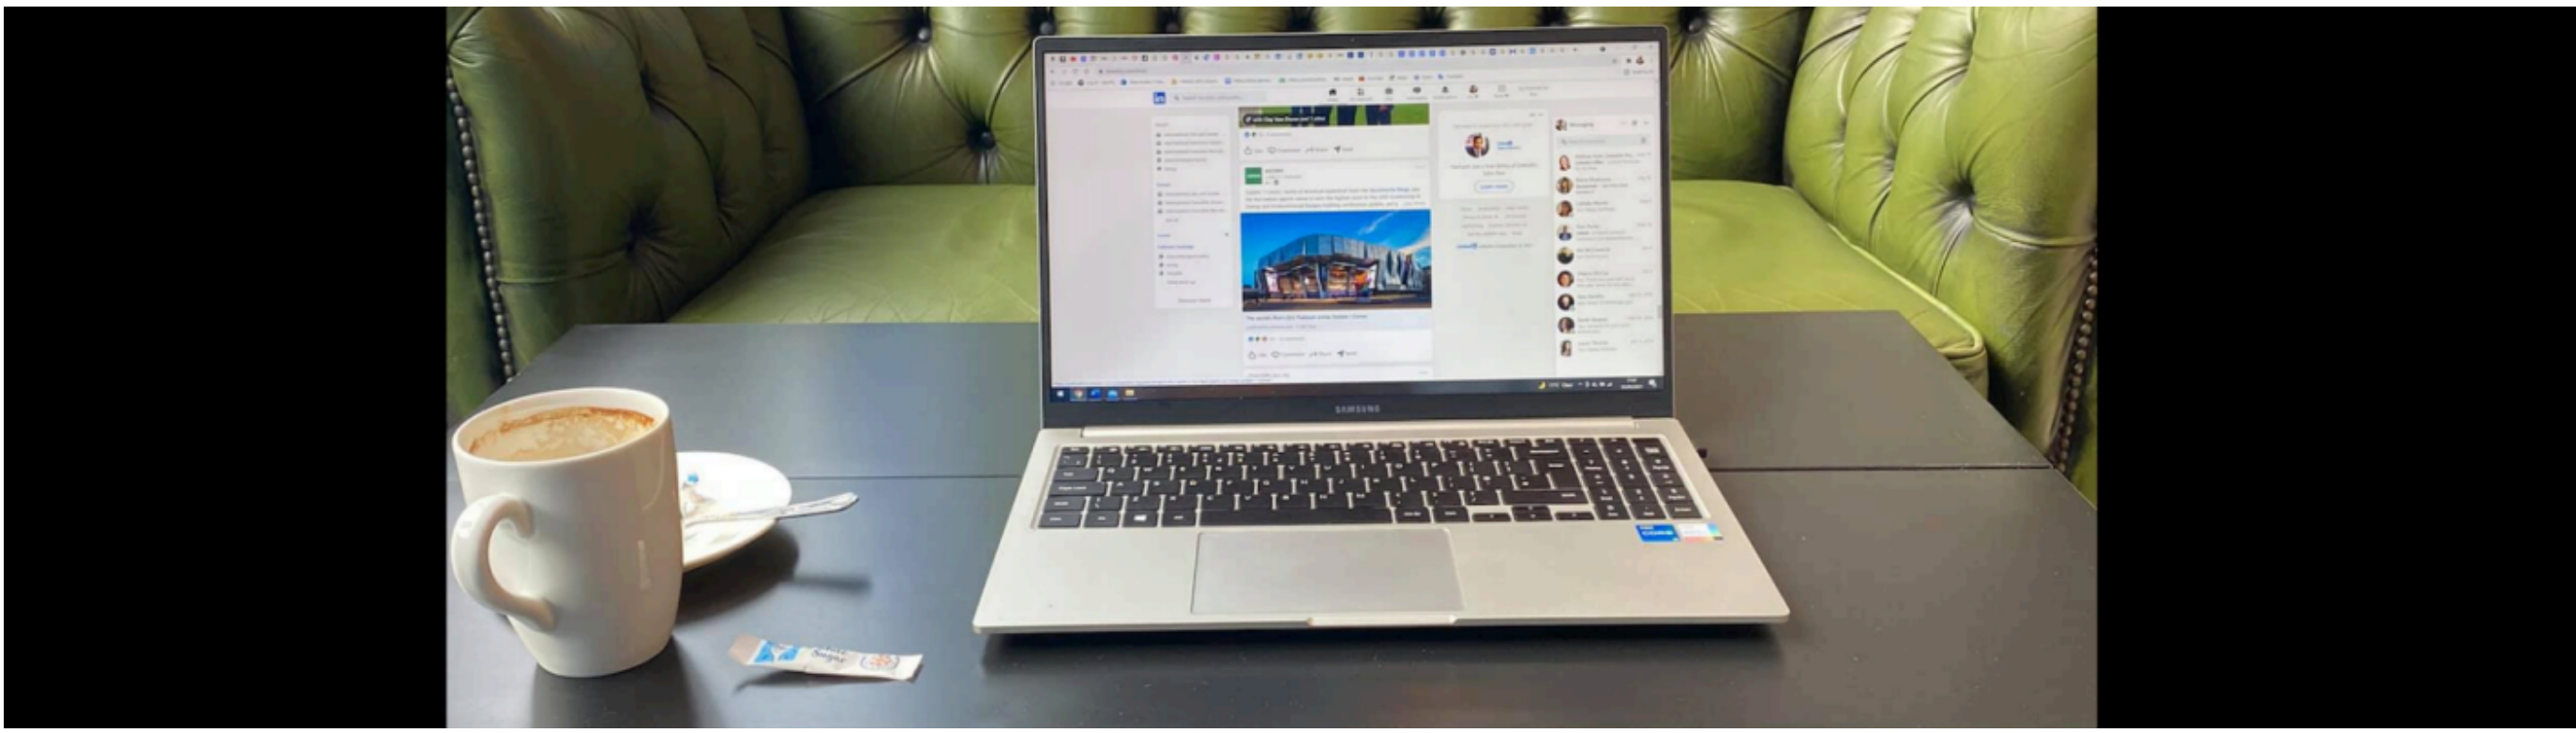

## <FONT COLOR = "Blue">HEMANT THAPA

#### LIBRARIES 

In [164]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from matplotlib.animation import FuncAnimation
import statistics as st
import yfinance as yf
import tensorflow as tf
import PIL
import math
import warnings
warnings.filterwarnings("ignore")

In [163]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers 
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [3]:
class stock:
    def __init__(self, ticker, time):
        self.ticker = ticker
        self.time = time
        
    def chart(self):
        return yf.download(self.ticker, period=self.time)

1. R-squared (R2): This metric indicates how well the variance in the dependent variable is explained by the independent variables in a regression model. It is a measure of the proportion of the variance in the dependent variable that's predictable from the independent variables.

2. Pearson Correlation: This metric measures the linear relationship between two variables. It's a value between -1 and 1, where -1 indicates a perfect negative linear relationship, 1 indicates a perfect positive linear relationship, and 0 indicates no linear relationship.

3. Mean Squared Error (MSE): This is a cost function commonly used in regression tasks. It measures the average squared difference between the predicted and actual values. Lower MSE values indicate better model performance.


4. Root Mean Squared Error (RMSE): RMSE is the square root of MSE. It's a more interpretable metric since it's in the same unit as the original target variable. Like MSE, lower RMSE values signify better model performance.

#### 1. COST FUNCTION USING PYTHON PROGRAMMING 

In [4]:
dataset = { "x":[20, 25, 22, 30],
           "y":[100, 150, 120, 180]
}

In [5]:
df = pd.DataFrame(dataset)

In [6]:
df

,x,y
0,20,100
1,25,150
2,22,120
3,30,180


In [7]:
print(f"X Mean: {st.mean(df['x'])}")
print(f"y Mean: {st.mean(df['y'])}")

X Mean: 24.25
y Mean: 137.5


#### TOTAL SUM OF SQUARE (SST)

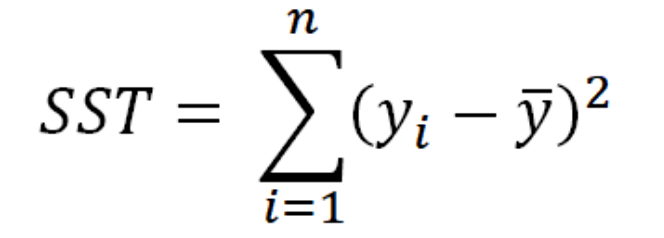

In [8]:
df

,x,y
0,20,100
1,25,150
2,22,120
3,30,180


In [9]:
y_mean = sum(df['y'])/len(df['y'])
x_mean = sum(df['x'])/len(df['x'])

In [10]:
sst = sum([(y - y_mean)**2 for y in df['y']])

In [11]:
print(f'Total Sum of Square: {sst}')

Total Sum of Square: 3675.0


#### SUM OF SQUARE OF RESIDUAL (SSE)

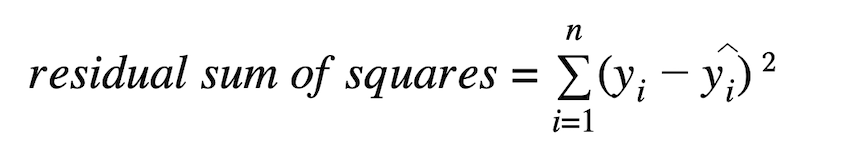

Calculating deviation from mean

In [12]:
df['xi - x mean'] = df['x'] - x_mean

In [13]:
df['yi - y mean'] = df['y'] - y_mean

In [14]:
df['(xi - x mean)(yi - y mean)'] = df['xi - x mean'] * df['yi - y mean']

In [15]:
df['(xi - x mean)**2'] = df['xi - x mean'] * df['xi - x mean']

In [16]:
df

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2
0,20,100,-4.25,-37.5,159.375,18.0625
1,25,150,0.75,12.5,9.375,0.5625
2,22,120,-2.25,-17.5,39.375,5.0625
3,30,180,5.75,42.5,244.375,33.0625


In [17]:
b1 = sum(df['(xi - x mean)(yi - y mean)'])/sum(df['(xi - x mean)**2'])

In [18]:
b1

7.973568281938326

In [19]:
bo = y_mean - b1 * x_mean

In [20]:
bo

-55.85903083700441

In [21]:
x_value = df['x']

In [22]:
x_value = x_value.tolist()

In [23]:
x_value

[20, 25, 22, 30]

In [24]:
predicted_values = [] 

for i in x_value:
    y = bo + b1 * i
    predicted_values.append(y)  

print(predicted_values)

[103.6123348017621, 143.48017621145374, 119.55947136563876, 183.34801762114537]


In [25]:
df['y predicted'] = predicted_values

In [26]:
df['Residual'] = df['y'] - df['y predicted']

In [27]:
df

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2,y predicted,Residual
0,20,100,-4.25,-37.5,159.375,18.0625,103.612335,-3.612335
1,25,150,0.75,12.5,9.375,0.5625,143.480176,6.519824
2,22,120,-2.25,-17.5,39.375,5.0625,119.559471,0.440529
3,30,180,5.75,42.5,244.375,33.0625,183.348018,-3.348018


In [28]:
sse = sum((df['Residual'])* df['Residual'])

In [29]:
print(f'Sum of Square Residual Error: {sse}')

Sum of Square Residual Error: 66.96035242290749


#### SUM OF SQUARE REGRESSION (SSR)

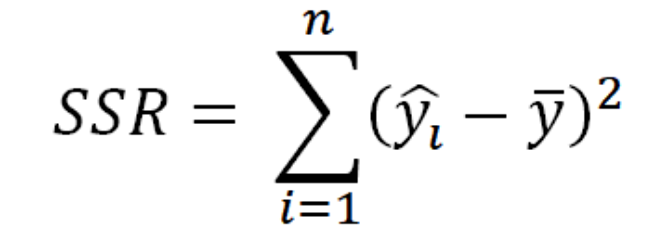

In [30]:
df['(y pred - y mean)**2'] = (df['y predicted'] - y_mean)**2

In [31]:
df

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2,y predicted,Residual,(y pred - y mean)**2
0,20,100,-4.25,-37.5,159.375,18.0625,103.612335,-3.612335,1148.373853
1,25,150,0.75,12.5,9.375,0.5625,143.480176,6.519824,35.762508
2,22,120,-2.25,-17.5,39.375,5.0625,119.559471,0.440529,321.862568
3,30,180,5.75,42.5,244.375,33.0625,183.348018,-3.348018,2102.040720


In [32]:
ssr = sum(df['(y pred - y mean)**2'])

In [33]:
print(f'Total Sum of Square Regression: {ssr}')

Total Sum of Square Regression: 3608.0396475770935


#### R SQUARE

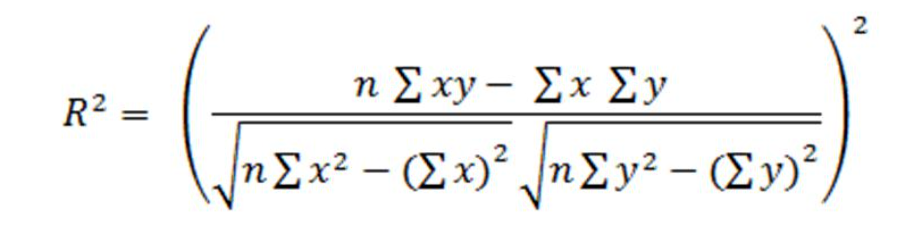

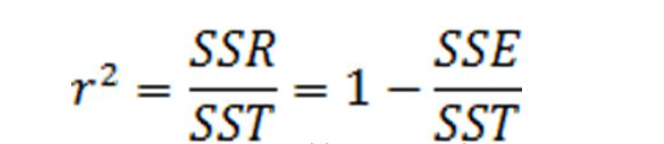

In [34]:
sst

3675.0

In [35]:
r_square = ssr/sst

In [36]:
f"R square: {r_square}"

'R square: 0.9817794959393452'

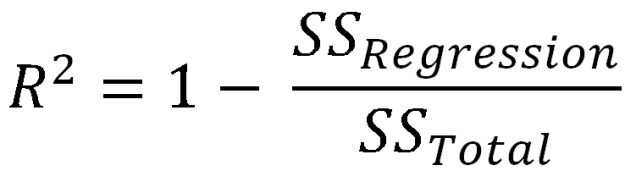

In [37]:
r_square = 1 - sse/sst

In [38]:
f"R square: {r_square}"

'R square: 0.9817794959393449'

#### MEAN SQUARE ERROR

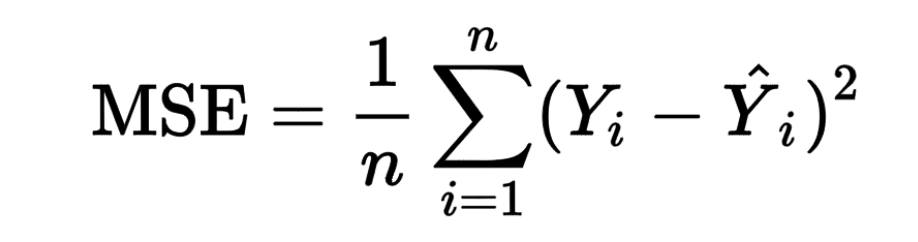

In [39]:
n = len(df['x'])
n

4

In [40]:
mse = 1/n * sum((df['y'] - df['y predicted']) * (df['y'] - df['y predicted']))

In [41]:
print(f"Mean Square Error: {mse}")

Mean Square Error: 16.740088105726873


#### ROOT MEAN SQUARE ERROR

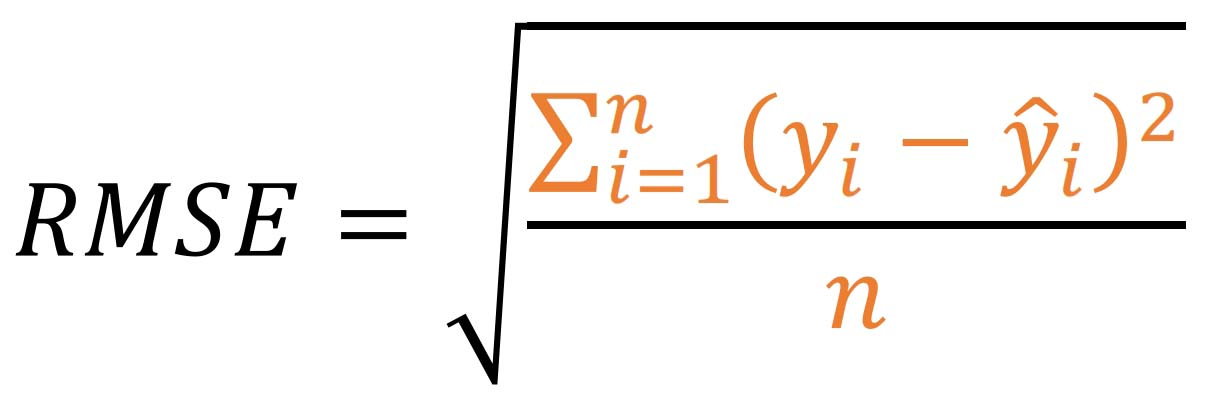

In [42]:
rmse = math.sqrt(mse)

In [43]:
print(f"Root Mean Square Error: {rmse}")

Root Mean Square Error: 4.091465276123809


#### PEARSON CORRELATION 

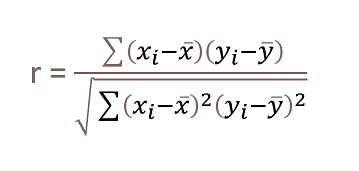

In [44]:
df['x square'] = df['x'] * df['x']
df['y square'] = df['y'] * df['y']
df['xy'] = df['x'] * df['y']

In [45]:
df

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2,y predicted,Residual,(y pred - y mean)**2,x square,y square,xy
0,20,100,-4.25,-37.5,159.375,18.0625,103.612335,-3.612335,1148.373853,400,10000,2000
1,25,150,0.75,12.5,9.375,0.5625,143.480176,6.519824,35.762508,625,22500,3750
2,22,120,-2.25,-17.5,39.375,5.0625,119.559471,0.440529,321.862568,484,14400,2640
3,30,180,5.75,42.5,244.375,33.0625,183.348018,-3.348018,2102.040720,900,32400,5400


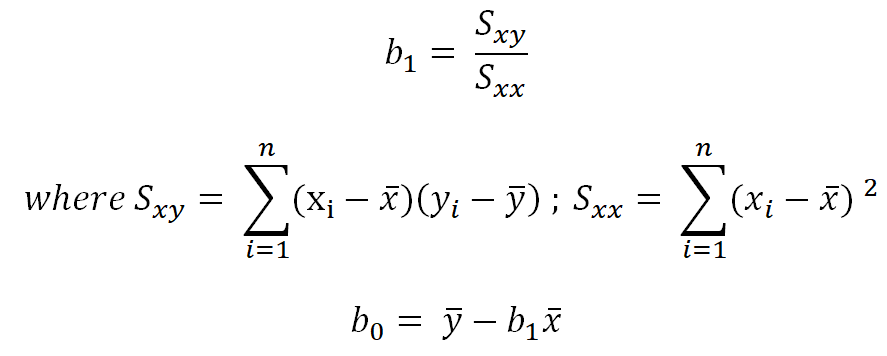

In [46]:
sum_of_product = sum(df['xy']) - (sum(df['x']) * sum(df['y'])) / len(df['x'])
sum_of_square_of_first_variable = sum(df['x square']) - (sum(df['x'])**2) / len(df['x'])
sum_of_square_of_second_variable = sum(df['y square']) - (sum(df['y'])**2) / len(df['y'])

In [47]:
sum_of_product

452.5

In [48]:
sum_of_square_of_first_variable

56.75

In [49]:
sum_of_square_of_second_variable

3675.0

In [50]:
pearson = sum_of_product / (math.sqrt(sum_of_square_of_first_variable * sum_of_square_of_second_variable))
print(f"Pearson Correlation: {pearson}")

Pearson Correlation: 0.9908478672022991


#### 2. COST FUNCTION USING SKLEARN: LINEAR REGRESSION MODEL

In [51]:
df

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2,y predicted,Residual,(y pred - y mean)**2,x square,y square,xy
0,20,100,-4.25,-37.5,159.375,18.0625,103.612335,-3.612335,1148.373853,400,10000,2000
1,25,150,0.75,12.5,9.375,0.5625,143.480176,6.519824,35.762508,625,22500,3750
2,22,120,-2.25,-17.5,39.375,5.0625,119.559471,0.440529,321.862568,484,14400,2640
3,30,180,5.75,42.5,244.375,33.0625,183.348018,-3.348018,2102.040720,900,32400,5400


In [52]:
x = df['x'].values.reshape(-1,1)
y = df['y'].values

In [53]:
x

array([[20],
       [25],
       [22],
       [30]])

In [54]:
y

array([100, 150, 120, 180])

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()

In [57]:
model.fit(x,y)

LinearRegression()

In [58]:
y_pred = model.predict(x)

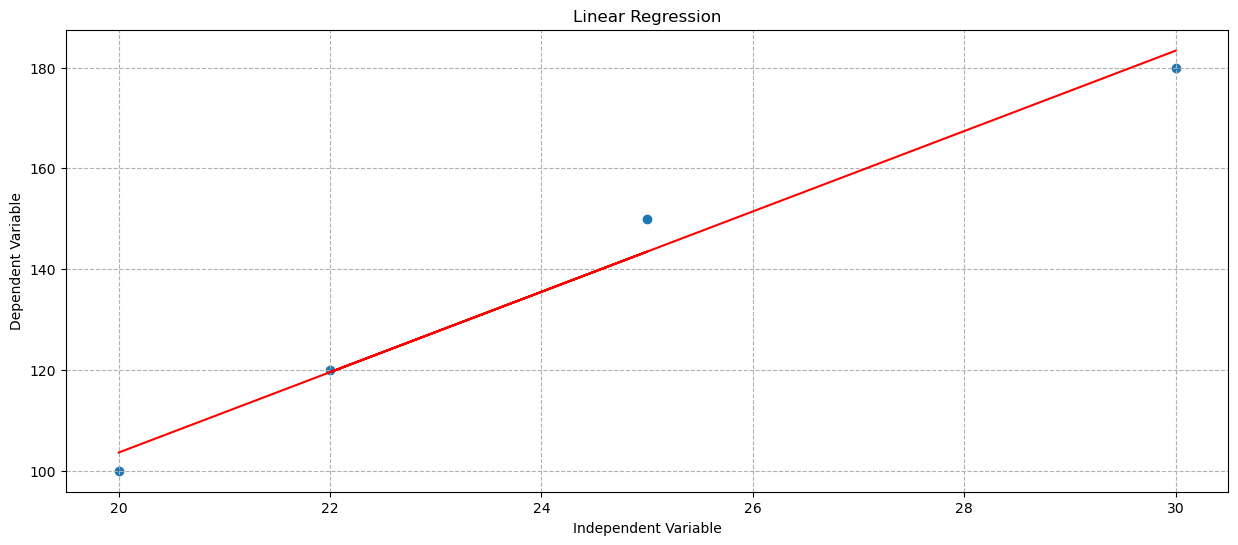

In [59]:
plt.figure(figsize=(15,6))
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], y_pred, color="red")
plt.grid(True, linestyle="--")
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Linear Regression")
plt.show()

#### Linear regression model with intercept bo & slope b1, and input i.


In [60]:
model.coef_

array([7.97356828])

In [61]:
b1

7.973568281938326

In [62]:
model.intercept_

-55.85903083700444

In [63]:
bo

-55.85903083700441

In [64]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### R SQUARE

In [65]:
r_square_sklean = r2_score(y, y_pred)
print(f'R Square Sklearn: {r_square_sklean}')

R Square Sklearn: 0.9817794959393449


#### MEAN SQUARE ERROR

In [66]:
mse = mean_squared_error(y, y_pred)
mse

16.740088105726873

In [67]:
print(f"Mean Square Error Sklearn: {mse}")

Mean Square Error Sklearn: 16.740088105726873


#### ROOT MEAN SQUARE ERROR

In [68]:
rmse = np.sqrt(mse)
rmse

4.091465276123809

In [69]:
print(f"Root Mean Square Error: {rmse}")

Root Mean Square Error: 4.091465276123809


#### MEAN ABSOLUTE ERROR

In [70]:
mae = mean_absolute_error(y, y_pred)

In [71]:
mae

3.4801762114537453

In [72]:
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 3.4801762114537453


#### PEARSON COEFFICIENT 

In [73]:
from sklearn.feature_selection import r_regression

In [74]:
pearson_coe = r_regression(x.reshape(-1,1),y,center=True, force_finite=True)[0]

In [75]:
print("Pearson correlation coefficient:", pearson_coe)

Pearson correlation coefficient: 0.9908478672022991


#### 3. COST FUNCTION - CORRELATION ANALYSIS (REAL TIME DATA)

1. Shell (Royal Dutch Shell): Shell is a British-Dutch multinational company. Its full name is Royal Dutch Shell plc. The company operates in all aspects of the oil and gas industry, including exploration, production, refining, distribution, and marketing. Shell is also involved in renewable energy sources, such as biofuels and wind energy. It is headquartered in The Hague, Netherlands, and has a significant global presence.

2. BP (British Petroleum): BP is a British multinational oil and gas company. It operates in all segments of the oil and gas industry, from exploration and production to refining and marketing. BP is also involved in the development of alternative and renewable energy sources, such as solar and wind power. The company is headquartered in London, United Kingdom.

Both Shell and BP have a long history in the petroleum industry and have expanded their operations to include various aspects of the energy sector, including a growing focus on cleaner and more sustainable energy sources in response to global environmental concerns and changing market dynamics.

In [76]:
bp = stock("BP.L", "10y").chart()

[*********************100%***********************]  1 of 1 completed


In [77]:
shel = stock("SHEL.L", "10y").chart()

[*********************100%***********************]  1 of 1 completed


In [78]:
bp[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-15,444.000000,444.981995,440.000000,441.200012,244.443420,22491681
2013-08-16,440.899994,442.125000,439.500000,441.700012,244.720398,20087744
2013-08-19,441.950012,442.250000,438.250000,439.500000,243.501602,11928070
2013-08-20,437.049988,437.700012,434.600006,437.200012,242.227264,18064716
2013-08-21,436.500000,436.899994,430.299988,432.549988,239.650909,17718169


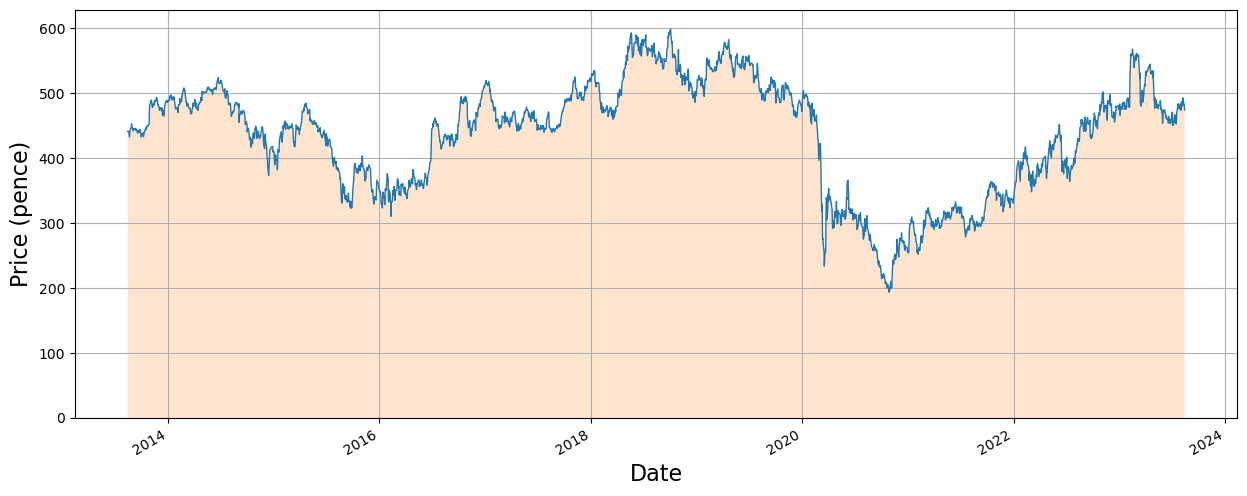

In [79]:
plt.figure(figsize=(15,6))
bp.Close.plot(linewidth=1)
plt.stackplot(bp.index, bp.Close, alpha=0.2)
plt.grid(True)
plt.ylabel("Price (pence)", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.show()

In [80]:
shel[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-15,2059.5,2082.000000,2029.5,2033.0,1175.055176,3674839
2013-08-16,2031.5,2072.750000,2030.5,2049.5,1184.592285,3843280
2013-08-19,2053.5,2053.500000,2037.0,2037.0,1177.367065,2163059
2013-08-20,2033.5,2045.900024,2027.5,2039.5,1178.812134,2246103
2013-08-21,2039.5,2042.000000,2025.5,2025.5,1170.720337,1682453


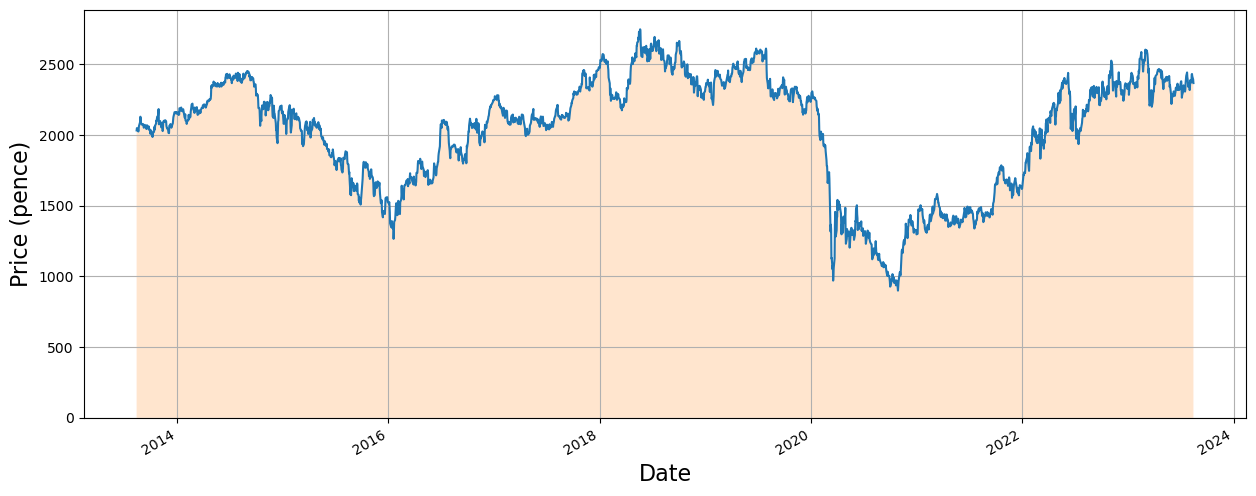

In [81]:
plt.figure(figsize=(15,6))
shel.Close.plot()
plt.stackplot(shel.index, shel.Close, alpha=0.2)
plt.grid(True)
plt.ylabel("Price (pence)", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.show()

#### Converting Pence into British Pound

In [82]:
x = bp.Close.values/100
y = shel.Close.values/100

In [83]:
x = x.reshape(-1,1)

In [84]:
x[:5]

array([[4.41200012],
       [4.41700012],
       [4.395     ],
       [4.37200012],
       [4.32549988]])

In [85]:
y = y.reshape(-1,1)

In [86]:
y[:5]

array([[20.33 ],
       [20.495],
       [20.37 ],
       [20.395],
       [20.255]])

In [87]:
print(x.shape)
print(y.shape)

(2519, 1)
(2525, 1)


In [88]:
y = y[:2519]

In [89]:
print(x.shape)
print(y.shape)

(2519, 1)
(2519, 1)


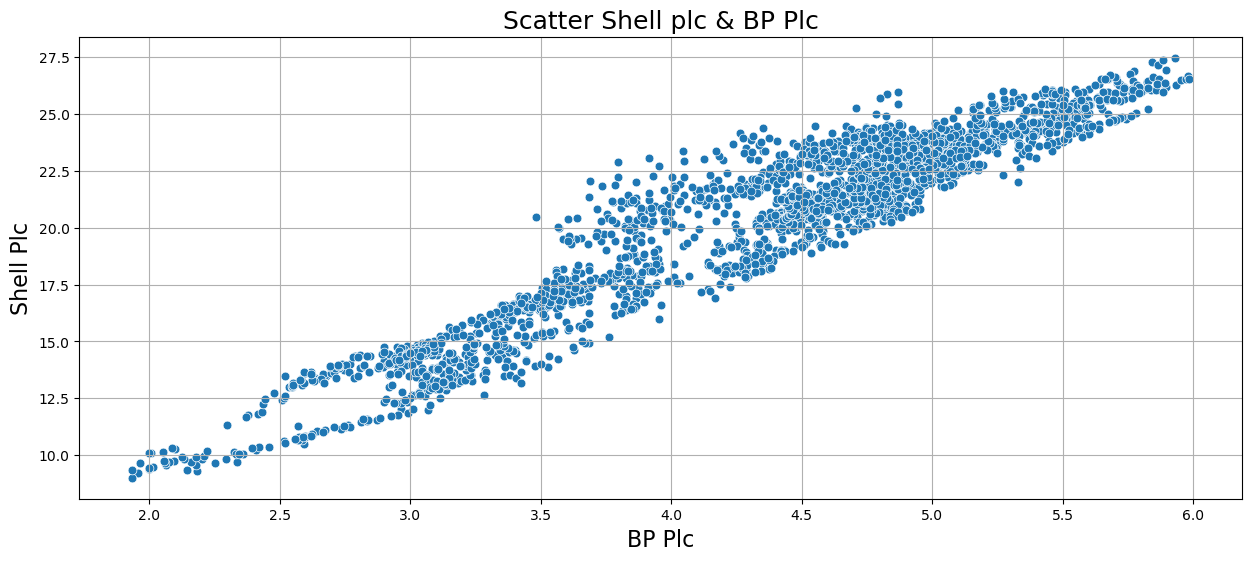

In [90]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=x.flatten(), y=y.flatten(), s=40)
plt.grid(True)
plt.ylabel("Shell Plc", fontsize=16)
plt.xlabel("BP Plc", fontsize=16)
plt.title("Scatter Shell plc & BP Plc", fontsize=18)
plt.show()

In [91]:
model = LinearRegression()

In [92]:
model.fit(x,y)

LinearRegression()

In [93]:
y_pred = model.predict(x)

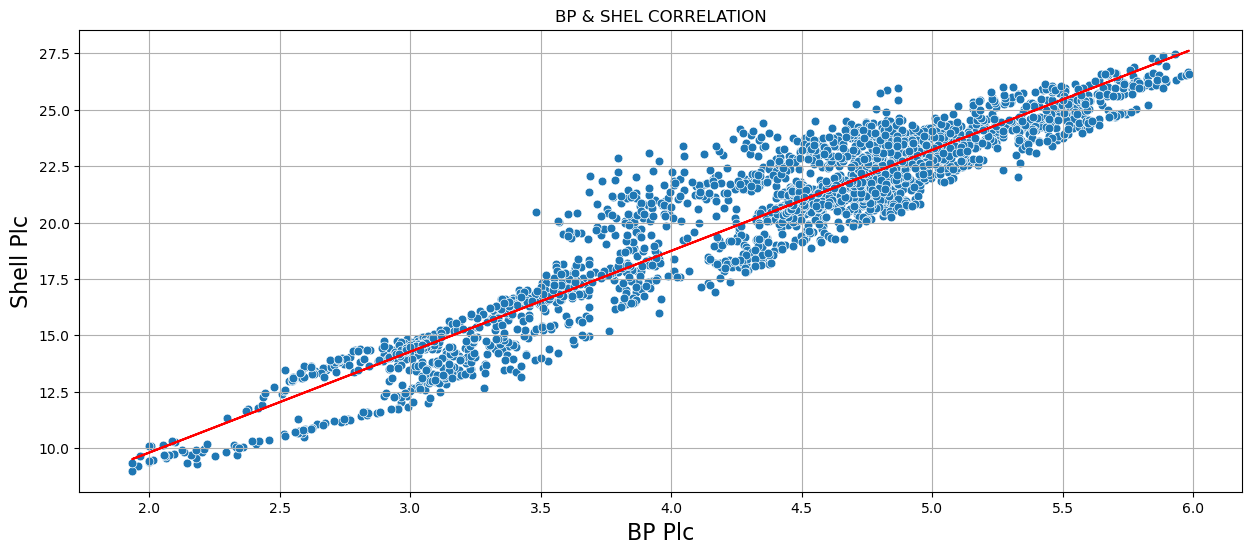

In [94]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=x.flatten(), y=y.flatten(), s=40)
plt.plot(x, y_pred, color="red")
plt.grid(True)
plt.title("BP & SHEL CORRELATION")
plt.ylabel("Shell Plc", fontsize=16)
plt.xlabel("BP Plc", fontsize=16)
plt.show()

In [95]:
model.intercept_

array([0.86296401])

In [96]:
model.coef_

array([[4.47100572]])

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

In [98]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r_square = r2_score(y, y_pred)

#### R SQUARE

In [99]:
r_square

0.901280472204654

#### MEAN SQUARE ERROR

In [100]:
mse

1.5965356531720136

#### ROOT MEAN SQUARE ERROR

In [101]:
rmse

1.2635409186773547

#### MEAN ABSOLUTE ERROR

In [102]:
mae

0.9759873694308268

#### PEARSON CORRELATION COEFFICIENT 

In [103]:
from sklearn.feature_selection import r_regression
pearson_coe = r_regression(x.reshape(-1,1),y,center=True, force_finite=True)[0]
print("Pearson correlation coefficient:", pearson_coe)

Pearson correlation coefficient: 0.9493579262873646


#### <font color="blue">4. COST FUNCTION: MANUAL CALCULATION WITHOUT ML LIBRARIES 

In [104]:
x = bp.Close.values/100
y = shel.Close.values/100

In [105]:
print(x.shape)
print(y.shape)

(2519,)
(2525,)


In [106]:
y = y[:2519]

In [107]:
print(x.shape)
print(y.shape)

(2519,)
(2519,)


In [108]:
dataset = { "x":x,
           "y":y
}

In [109]:
df = pd.DataFrame(dataset)

In [110]:
df

,x,y
0,4.4120,20.330
1,4.4170,20.495
2,4.3950,20.370
3,4.3720,20.395
4,4.3255,20.255
...,...,...
2514,4.9265,23.515
2515,4.9090,23.185
2516,4.8640,23.390
2517,4.8175,23.885


In [111]:
print(f"X Mean: {st.mean(df['x'])}")
print(f"y Mean: {st.mean(df['y'])}")

X Mean: 4.346133115676813
y Mean: 20.29455002454975


#### TOTAL SUM OF SQUARE (SST)

In [112]:
y_mean = sum(df['y'])/len(df['y'])
x_mean = sum(df['x'])/len(df['x'])

In [113]:
sst = sum([(y - y_mean)**2 for y in df['y']])
print(f'Total Sum of Square: {sst}')

Total Sum of Square: 40738.37669359164


#### SUM OF SQUARE OF RESIDUAL (SSE)

In [114]:
df['xi - x mean'] = df['x'] - x_mean
df['yi - y mean'] = df['y'] - y_mean
df['(xi - x mean)(yi - y mean)'] = df['xi - x mean'] * df['yi - y mean']
df['(xi - x mean)**2'] = df['xi - x mean'] * df['xi - x mean']

In [115]:
df[:5]

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2
0,4.4120,20.330,0.065867,0.03545,0.002335,0.004338
1,4.4170,20.495,0.070867,0.20045,0.014205,0.005022
2,4.3950,20.370,0.048867,0.07545,0.003687,0.002388
3,4.3720,20.395,0.025867,0.10045,0.002598,0.000669
4,4.3255,20.255,-0.020633,-0.03955,0.000816,0.000426


#### INTERCEPT & SLOPE

#### Linear regression model with intercept bo, slope b1, and input i.

In [116]:
b1 = sum(df['(xi - x mean)(yi - y mean)'])/sum(df['(xi - x mean)**2'])

In [117]:
b1

4.471005718444291

In [118]:
bo = y_mean - b1 * x_mean

In [119]:
bo

0.8629640112385957

In [120]:
x_value = df['x']

In [121]:
x_value = x_value.tolist()

In [122]:
x_value[:5]

[4.412000122070313,
 4.417000122070313,
 4.395,
 4.372000122070313,
 4.325499877929688]

In [123]:
predicted_values = [] 

for i in x_value:
    y = bo + b1 * i
    predicted_values.append(y)  

In [124]:
df['y predicted'] = predicted_values
df['Residual'] = df['y'] - df['y predicted']

In [125]:
df[:5]

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2,y predicted,Residual
0,4.4120,20.330,0.065867,0.03545,0.002335,0.004338,20.589042,-0.259042
1,4.4170,20.495,0.070867,0.20045,0.014205,0.005022,20.611397,-0.116397
2,4.3950,20.370,0.048867,0.07545,0.003687,0.002388,20.513034,-0.143034
3,4.3720,20.395,0.025867,0.10045,0.002598,0.000669,20.410202,-0.015202
4,4.3255,20.255,-0.020633,-0.03955,0.000816,0.000426,20.202299,0.052701


In [126]:
sse = sum((df['Residual'])* df['Residual'])
print(f'Sum of Square Residual Error: {sse}')

Sum of Square Residual Error: 4021.673310340304


#### SUM OF SQUARE REGRESSION (SSR)

In [127]:
df['(y pred - y mean)**2'] = (df['y predicted'] - y_mean)**2

In [128]:
ssr = sum(df['(y pred - y mean)**2'])
print(f'Total Sum of Square Regression: {ssr}')

Total Sum of Square Regression: 36716.70338325133


#### R SQUARE

In [129]:
r_square = ssr/sst
f"R square: {r_square}"

'R square: 0.9012804722046537'

In [130]:
r_square = 1 - sse/sst
f"R square: {r_square}"

'R square: 0.9012804722046538'

#### MEAN SQUARE ERROR

In [131]:
n = len(df['x'])
mse = 1/n * sum((df['y'] - df['y predicted']) * (df['y'] - df['y predicted']))
print(f"Mean Square Error: {mse}")

Mean Square Error: 1.5965356531720143


#### ROOT MEAN SQUARE ERROR

In [132]:
rmse = math.sqrt(mse)
print(f"Root Mean Square Error: {rmse}")

Root Mean Square Error: 1.263540918677355


#### PEARSON CORRELATION

In [133]:
df['x square'] = df['x'] * df['x']
df['y square'] = df['y'] * df['y']
df['xy'] = df['x'] * df['y']

In [134]:
df[:5]

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2,y predicted,Residual,(y pred - y mean)**2,x square,y square,xy
0,4.4120,20.330,0.065867,0.03545,0.002335,0.004338,20.589042,-0.259042,0.086725,19.465745,413.308900,89.695962
1,4.4170,20.495,0.070867,0.20045,0.014205,0.005022,20.611397,-0.116397,0.100392,19.509890,420.045025,90.526418
2,4.3950,20.370,0.048867,0.07545,0.003687,0.002388,20.513034,-0.143034,0.047735,19.316025,414.936900,89.526150
3,4.3720,20.395,0.025867,0.10045,0.002598,0.000669,20.410202,-0.015202,0.013375,19.114385,415.956025,89.166942
4,4.3255,20.255,-0.020633,-0.03955,0.000816,0.000426,20.202299,0.052701,0.008510,18.709949,410.265025,87.613000


In [135]:
sum_of_product = sum(df['xy']) - (sum(df['x']) * sum(df['y'])) / len(df['x'])
sum_of_square_of_first_variable = sum(df['x square']) - (sum(df['x'])**2) / len(df['x'])
sum_of_square_of_second_variable = sum(df['y square']) - (sum(df['y'])**2) / len(df['y'])

In [136]:
sum_of_product

8212.179920009221

In [137]:
sum_of_square_of_first_variable

1836.763457074252

In [138]:
sum_of_square_of_second_variable

40738.37669359497

In [139]:
pearson = sum_of_product / (math.sqrt(sum_of_square_of_first_variable * sum_of_square_of_second_variable))
print(f"Pearson Correlation: {pearson}")

Pearson Correlation: 0.9493579262874152


#### 5. COST FUNCTION: NEURAL NETWORK - LINEAR MODEL

In [140]:
x = bp.Close.values/100
y = shel.Close.values/100

In [141]:
x.shape

(2519,)

In [142]:
y.shape

(2525,)

In [143]:
y = y[:2519]

In [144]:
y.shape

(2519,)

In [145]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

In [146]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_val_scaled = scaler.transform(X_val.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

In [155]:
model = keras.Sequential([
    layers.Dense(1, input_shape=(1,), activation='linear')
])

In [156]:
optimizer = Adam(learning_rate=0.01)

In [157]:
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

In [158]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, callbacks=[early_stopping])

Epoch 1/100
51/51 [==============================] - 1s 6ms/step - loss: 427.7713 - mae: 20.1646 - val_loss: 392.6013 - val_mae: 19.2285
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 404.2962 - mae: 19.6599 - val_loss: 372.0424 - val_mae: 18.7840
Epoch 3/100
51/51 [==============================] - 0s 5ms/step - loss: 381.9585 - mae: 19.1599 - val_loss: 352.4911 - val_mae: 18.3416
Epoch 4/100
51/51 [==============================] - 0s 4ms/step - loss: 360.8593 - mae: 18.6627 - val_loss: 333.9389 - val_mae: 17.9007
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 340.9234 - mae: 18.1781 - val_loss: 316.2742 - val_mae: 17.4637
Epoch 6/100
51/51 [==============================] - 0s 4ms/step - loss: 321.9699 - mae: 17.6985 - val_loss: 299.4559 - val_mae: 17.0302
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 304.0308 - mae: 17.2273 - val_loss: 283.4148 - val_mae: 16.6002
Epoch 8/100
51/51 [======================

In [159]:
y_pred_scaled = model.predict(X_test_scaled).flatten()
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

16/16 [==============================] - 0s 1ms/step


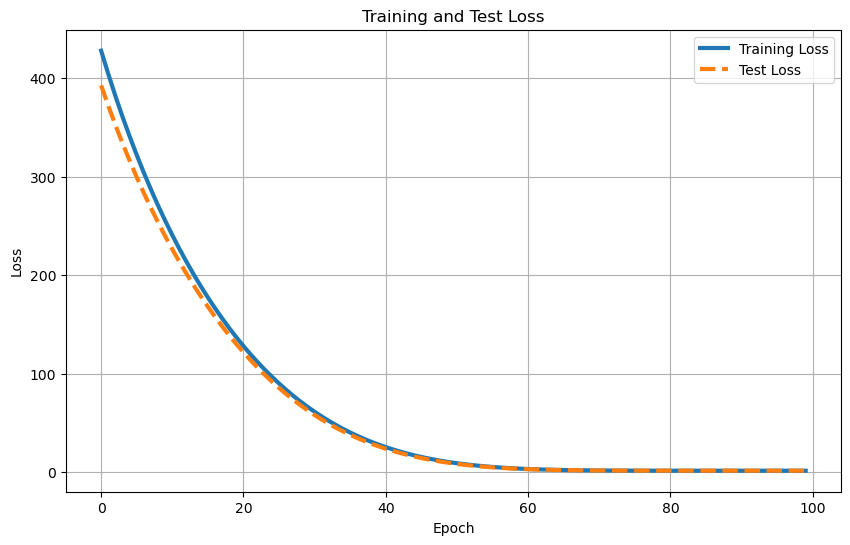

In [160]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=3)
plt.plot(history.history['val_loss'], label='Test Loss', linewidth=3, linestyle="--")
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [162]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_square)

Mean Absolute Error: 1.5329578715278989
Mean Squared Error: 3.451196743699392
Root Mean Squared Error: 1.857739686742842
R-squared: 0.7823927435662008


#### REFRENCES:
    
Sayad, S. (n.d.). Machine Learning - Regression. Retrieved from http://saedsayad.com/mlr.htm

scikit-learn. (n.d.). sklearn.feature_selection.RFE — scikit-learn 0.24.2 documentation. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.r_regression.html#:~:text=Pearson's%20r%20is%20also%20known,free%20standing%20feature%20selection%20procedure.

Sayad, S. (n.d.). Model Evaluation - Regression. Retrieved from https://www.saedsayad.com/model_evaluation_r.htm